In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
train_dir = "C:\\Users\\HP\\Downloads\\brain tumour\\Training"
test_dir = "C:\\Users\\HP\\Downloads\\brain tumour\\Testing"

In [6]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = test_generator.samples // BATCH_SIZE

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps
)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 30s 328ms/step - accuracy: 0.3489 - loss: 1.3656 - val_accuracy: 0.1901 - val_loss: 1.6144
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.4375 - loss: 1.1388 - val_accuracy: 0.4000 - val_loss: 1.2500
Epoch 3/10


C:\Users\HP\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


89/89 ━━━━━━━━━━━━━━━━━━━━ 29s 329ms/step - accuracy: 0.4578 - loss: 1.1769 - val_accuracy: 0.2969 - val_loss: 2.8443
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4688 - loss: 0.9524 - val_accuracy: 0.2000 - val_loss: 3.4800
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 30s 334ms/step - accuracy: 0.5476 - loss: 1.0173 - val_accuracy: 0.3203 - val_loss: 2.1671
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5312 - loss: 1.0465 - val_accuracy: 0.4000 - val_loss: 1.8347
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.5765 - loss: 0.9552 - val_accuracy: 0.2917 - val_loss: 3.1833
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5312 - loss: 1.0198 - val_accuracy: 0.3000 - val_loss: 2.6374
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 307ms/step - accuracy: 0.6404 - loss: 0.8595 - val_accuracy: 0.3490 - val_loss: 2.9928
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.5312 - loss: 0.8583 - val_accuracy: 0.2000 - v

In [12]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test Accuracy: {test_acc:.4f}')

13/13 - 1s - 78ms/step - accuracy: 0.3376 - loss: 2.9988
Test Accuracy: 0.3376


In [13]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

print(classification_report(true_classes, predicted_classes, target_names=train_generator.class_indices.keys()))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.33      0.05      0.09       100
meningioma_tumor       0.22      0.02      0.03       115
        no_tumor       0.27      0.87      0.41       105
 pituitary_tumor       0.16      0.07      0.09        74

        accuracy                           0.26       394
       macro avg       0.25      0.25      0.16       394
    weighted avg       0.25      0.26      0.16       394



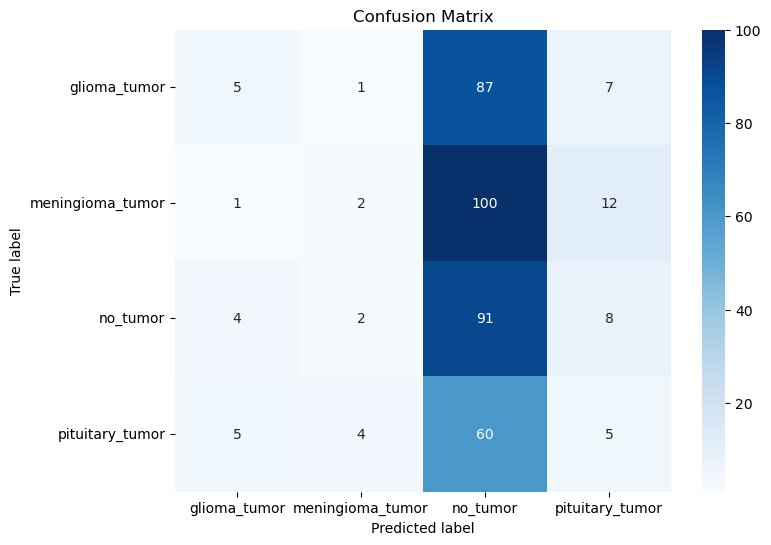

In [14]:
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


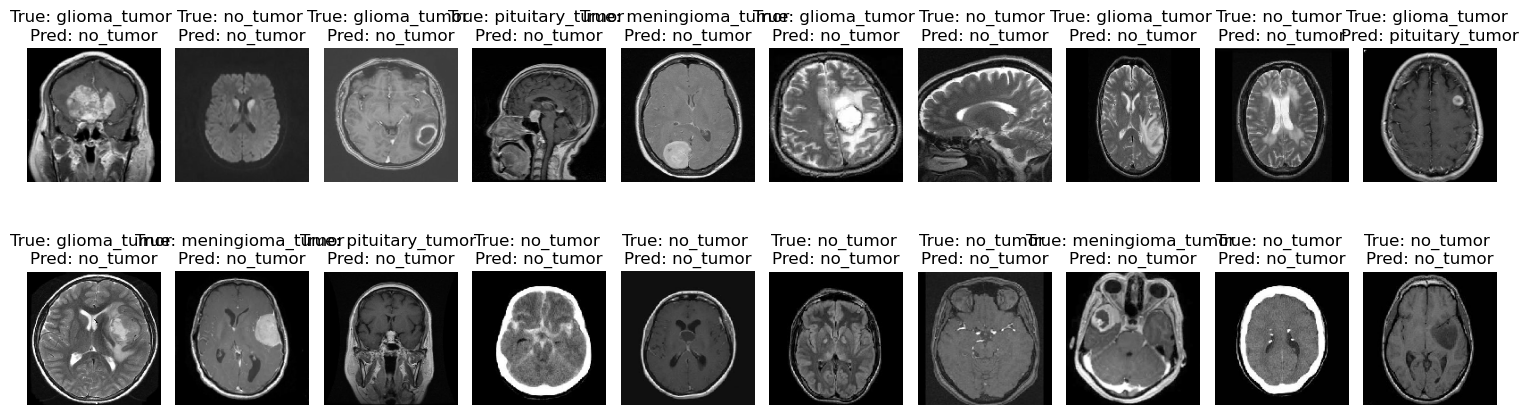

In [15]:
def plot_predictions(generator, num_images=20):
    images, labels = next(generator)
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[true_classes[i]]} \nPred: {class_names[predicted_classes[i]]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_predictions(test_generator)